# Electricity & Weather Data Analysis

# Introduction
This project is meant to gather insights on electricity usage.

This file looks for insights into electricity usage relative to weather data.

## Data
* This uses data cleaned with "green_button_data_cleaning.ipynb": clean_energy_use_*.csv
* This uses data cleaned with "weather_data_cleaning.ipynb.ipynb": clean_weather_*.csv


## Original Energy Data Source
Data is from my energy company(ComEd) from the past year. 10_22_2022 to 10_22_2023
Data from the [My Green Button](https://secure.comed.com/MyAccount/MyBillUsage/pages/secure/GreenButtonConnectDownloadMyData.aspx) webpage on the ComEd website.

## Original Weather Data Source
This data was collected using [Meteostat](https://github.com/meteostat/meteostat-python). The Meteostat Python library provides a simple API for accessing open weather and climate data. The historical observations and statistics are collected by Meteostat from different public interfaces, most of which are governmental.

Among the data sources are national weather services like the National Oceanic and Atmospheric Administration (NOAA) and Germany's national meteorological service (DWD).

# Data Column Descriptions

## energy_df
* **DATE**: Day recorded
* **START_TIME**: start of recording in Hour:Minutes
* **END_TIME**: end of recording in Hour:Minutes
* **USAGE**: Electric usage in kWh
* **COST**: amount charged for energy usage in USD

## weather_df
src: [Meteostat Documentation](https://dev.meteostat.net/python/hourly.html#data-structure)

| | | |
|-|-|-|
|**Column**|**Description**|**Type**|
|**time**|datetime of the observation|Datetime64|
|**temp**|air temperature in *°C*|Float64|
|**dwpt**|dew point in *°C*|Float64|
|**rhum**|relative humidity in percent (*%*)|Float64|
|**prcp**|one hour precipitation total in *mm*|Float64|
|**wdir**|average wind direction in degrees (*°*)|Float64|
|**wspd**|average wind speed in *km/h*|Float64|
|**pres**|average sea-level air pressure in *hPa*|Float64|

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import clean_energy_use spreadsheet from 'data' directory

# Define the directory path and the regular expression pattern
import glob
directory_path = "./data"
file_pattern = "clean_energy_use*.csv"

# Use glob.glob to match filenames based on the pattern
file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
energy_df = pd.read_csv(filepath_or_buffer=file_path)
energy_df.info()
energy_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17517 entries, 0 to 17516
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_TIME  17517 non-null  object 
 1   DATE        17517 non-null  object 
 2   END_TIME    17517 non-null  object 
 3   USAGE       17517 non-null  float64
 4   COST        17517 non-null  float64
dtypes: float64(2), object(3)
memory usage: 684.4+ KB


,START_TIME,DATE,END_TIME,USAGE,COST
0,2022-10-22 00:00:00,2022-10-22 00:00:00,2022-10-22 00:29:00,0.11,0.01
1,2022-10-22 00:30:00,2022-10-22 00:00:00,2022-10-22 00:59:00,0.13,0.02
2,2022-10-22 01:00:00,2022-10-22 00:00:00,2022-10-22 01:29:00,0.09,0.01
3,2022-10-22 01:30:00,2022-10-22 00:00:00,2022-10-22 01:59:00,0.20,0.02
4,2022-10-22 02:00:00,2022-10-22 00:00:00,2022-10-22 02:29:00,0.10,0.01


In [4]:
# Import clean_weather spreadsheet from 'data' directory

# Define the directory path and the regular expression pattern
import glob
directory_path = "./data"
file_pattern = "clean_weather*.csv"

# Use glob.glob to match filenames based on the pattern
file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
weather_df = pd.read_csv(filepath_or_buffer=file_path)
weather_df.info()
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    8785 non-null   object 
 1   temp    8785 non-null   float64
 2   dwpt    8785 non-null   float64
 3   rhum    8785 non-null   float64
 4   prcp    8785 non-null   float64
 5   wdir    8785 non-null   float64
 6   wspd    8785 non-null   float64
 7   pres    8785 non-null   float64
dtypes: float64(7), object(1)
memory usage: 549.2+ KB


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2022-10-21 00:00:00,13.0,1.1,44.0,0.0,190.0,7.6,1008.0
1,2022-10-21 01:00:00,10.7,1.0,51.0,0.0,160.0,7.6,1008.0
2,2022-10-21 02:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
3,2022-10-21 03:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
4,2022-10-21 04:00:00,7.6,1.5,65.0,0.0,170.0,5.4,1008.0


## Observations & TODOs

- [x] convert the time/START_TIME cols into Datetime objs
- [x] convert half-hour data granularity of the energy_df into 1hr rows
- [x] Merge the dataset on the time start of each row
- [ ] analyze correlations between weather variables and electricty usage
- [ ] vizualize these correlations
- [ ] recreate previous analysis graphs with weather data plotted along side
- [ ] analyze these vizualizations
- [ ] for each month: xaxis:24hrs, yaxis:average weather, average electricity usage
- [ ] calc a temperature_feel col from weather data
- [ ] vizualize: xaxis:bucket temperatures every 5C?, yaxis:electricity usage
- [ ] create an AI to predict energy usage based on weather data
- [ ] **MAYBE** find a way to create an intuitive random forest tree from the data
- [ ] 

In [5]:
# convert the time cols into Datetime objs
weather_df['time'] = pd.to_datetime(weather_df['time'], format='%Y-%m-%d %H:%M:%S')
print(weather_df['time'].dtypes)
weather_df.head(4)

datetime64[ns]


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2022-10-21 00:00:00,13.0,1.1,44.0,0.0,190.0,7.6,1008.0
1,2022-10-21 01:00:00,10.7,1.0,51.0,0.0,160.0,7.6,1008.0
2,2022-10-21 02:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
3,2022-10-21 03:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0


In [6]:
# convert the START_TIME col into Datetime objs
energy_df['START_TIME'] = pd.to_datetime(energy_df['START_TIME'], format='%Y-%m-%d %H:%M:%S')
print(energy_df['START_TIME'].dtypes)
energy_df.head(4)

datetime64[ns]


,START_TIME,DATE,END_TIME,USAGE,COST
0,2022-10-22 00:00:00,2022-10-22 00:00:00,2022-10-22 00:29:00,0.11,0.01
1,2022-10-22 00:30:00,2022-10-22 00:00:00,2022-10-22 00:59:00,0.13,0.02
2,2022-10-22 01:00:00,2022-10-22 00:00:00,2022-10-22 01:29:00,0.09,0.01
3,2022-10-22 01:30:00,2022-10-22 00:00:00,2022-10-22 01:59:00,0.20,0.02


In [7]:
# convert half-hour data granularity of the energy_df into 1hr rows
energy_df['HOUR'] = energy_df['START_TIME'].dt.floor('H')
print(energy_df['HOUR'].dtypes)
energy_df.head(4)

datetime64[ns]


,START_TIME,DATE,END_TIME,USAGE,COST,HOUR
0,2022-10-22 00:00:00,2022-10-22 00:00:00,2022-10-22 00:29:00,0.11,0.01,2022-10-22 00:00:00
1,2022-10-22 00:30:00,2022-10-22 00:00:00,2022-10-22 00:59:00,0.13,0.02,2022-10-22 00:00:00
2,2022-10-22 01:00:00,2022-10-22 00:00:00,2022-10-22 01:29:00,0.09,0.01,2022-10-22 01:00:00
3,2022-10-22 01:30:00,2022-10-22 00:00:00,2022-10-22 01:59:00,0.20,0.02,2022-10-22 01:00:00


In [8]:
# convert half-hour data granularity of the energy_df into 1hr rows
energy_pivot = energy_df.pivot_table(index='HOUR', values=['USAGE', 'COST'], aggfunc='sum')
energy_pivot.reset_index(inplace=True)
print(energy_pivot.columns)
energy_pivot.head(3)

Index(['HOUR', 'COST', 'USAGE'], dtype='object')


,HOUR,COST,USAGE
0,2022-10-22 00:00:00,0.03,0.24
1,2022-10-22 01:00:00,0.03,0.29
2,2022-10-22 02:00:00,0.02,0.20


In [9]:
energy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   HOUR    8759 non-null   datetime64[ns]
 1   COST    8759 non-null   float64       
 2   USAGE   8759 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 205.4 KB


In [10]:
# convert HOUR col back to datetime
energy_pivot['HOUR'] = pd.to_datetime(energy_pivot['HOUR'], format='%Y-%m-%d %H:%M:%S')
energy_pivot.head(3)

,HOUR,COST,USAGE
0,2022-10-22 00:00:00,0.03,0.24
1,2022-10-22 01:00:00,0.03,0.29
2,2022-10-22 02:00:00,0.02,0.20


In [11]:
weather_df.sample(3)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
5010,2023-05-17 18:00:00,20.5,9.2,48.0,0.0,100.0,16.6,1016.0
4480,2023-04-25 16:00:00,10.3,5.1,70.0,0.0,60.0,11.2,1021.0
954,2022-11-29 18:00:00,14.2,10.4,78.0,0.3,180.0,48.2,1000.0


In [12]:
# merge datasets
energy_weather_df = pd.merge(weather_df, energy_pivot, how='inner', left_on='time', right_on='HOUR')
energy_weather_df.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,HOUR,COST,USAGE
0,2022-10-22 00:00:00,21.4,5.8,36.0,0.0,190.0,14.8,1007.0,2022-10-22 00:00:00,0.03,0.24
1,2022-10-22 01:00:00,19.6,6.1,41.0,0.0,180.0,16.6,1007.0,2022-10-22 01:00:00,0.03,0.29
2,2022-10-22 02:00:00,17.5,5.5,45.0,0.0,180.0,9.4,1008.0,2022-10-22 02:00:00,0.02,0.20
3,2022-10-22 03:00:00,14.0,5.2,55.0,0.0,160.0,11.2,1008.0,2022-10-22 03:00:00,0.02,0.09
4,2022-10-22 04:00:00,14.2,5.4,55.0,0.0,170.0,11.2,1009.0,2022-10-22 04:00:00,0.02,0.09


In [13]:
usage_corr = abs(energy_weather_df.corr()['USAGE']).sort_values(ascending=False)
print(usage_corr)

USAGE    1.000000
COST     0.997469
temp     0.809782
dwpt     0.795263
time     0.620278
HOUR     0.620278
wspd     0.335373
wdir     0.286017
pres     0.191690
rhum     0.091558
prcp     0.055778
Name: USAGE, dtype: float64


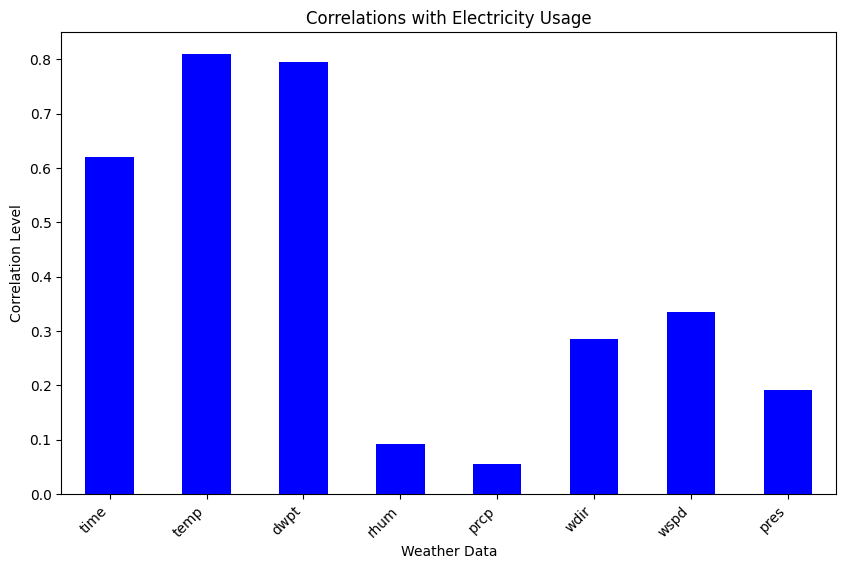

In [19]:
# Plot energy usage correlations with the weather columns
plt.figure(figsize=(10, 6))
usage_corr[weather_df.columns].plot(kind='bar', color='blue')
plt.title('Correlations with Electricity Usage')
plt.xlabel('Weather Data')
plt.ylabel('Correlation Level')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation Analysis: Electricty Usage & Weather 
* strong positive correlations between temperature & dew point.
* very weak correlation between windspeed & wind direction